<a href="https://colab.research.google.com/github/balsrini/EIP/blob/master/Session2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Not an ideal network**

In [0]:
# https://keras.io/
!pip install -q keras
import keras

In [0]:
import numpy as np

from keras.models import Sequential
from keras.layers import Flatten
from keras.layers import Convolution2D
from keras.utils import np_utils

from keras.datasets import mnist

In [0]:
# loading the digits data from mnist.
(X_train, y_train), (X_test, y_test) = mnist.load_data()

(60000, 28, 28)


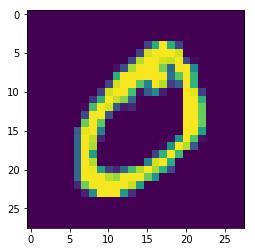

In [22]:
#Printing the total images and shape of the images downloaded from mnist
print(X_train.shape)

from matplotlib import pyplot as plt
%matplotlib inline
#plot the image to show inline
plt.imshow(X_train[0])

In [0]:
#Reshape the training data with 60000 x 28 x 28 x 1
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
#Reshape the test data with 60000 x 28 x 28 x 1
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

In [0]:
#convert the matrix data to float32 so that it can be divided by 255.
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [10]:
#Show the output of the first 10 digit in the X_train
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
# Convert to the 10 dimensional matrix for comparision.
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [12]:
#show the print of the Matrix. Each digit location represent the '1' in the matrix
Y_train[:10]


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [13]:
from keras.layers import Activation, MaxPooling2D

#Constructing a network
model = Sequential() 
#28 x 28 x 1 | (3 x 3) x 32 
model.add(Convolution2D(32, 3, 3, activation='relu', input_shape=(28,28,1)))
#26 x 26 x 32 | (3 x 3) x 64 
model.add(Convolution2D(64, 3, 3, activation='relu'))
#24 x 24 x 64 | (3 x 3) x 128
model.add(Convolution2D(128, 3, 3, activation='relu'))

# 22 x 22 x 128 | Max pool
model.add(MaxPooling2D(pool_size=(2, 2)))

# 11 x 11 x 128 | (3 x 3) x 256 
model.add(Convolution2D(256, 3, 3, activation='relu'))
# 9 x 9 x 256 |  (3 x 3 ) x 512
model.add(Convolution2D(512, 3, 3, activation='relu'))
# 7 x 7 x 512 | (3 x 3) x 1024
model.add(Convolution2D(1024, 3, 3, activation='relu'))
# 5 x 5 x 1024 | (3 x 3) x 2048 
model.add(Convolution2D(2048, 3, 3, activation='relu'))
# 3 x 3 x 2048 | (3 x 3) x 10
model.add(Convolution2D(10, 3, 3, activation='relu'))
# 1 x 1 x 10
model.add(Flatten())

#softmax activation
model.add(Activation('softmax'))

model.summary()

Instructions for updating:
Colocations handled automatically by placer.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu")`
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, (3, 3), activation="relu")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(256, (3, 3), activation="relu")`
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(512, (3, 3), activation="relu")`
  # This is added back by InteractiveShellApp.init

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 22, 22, 128)       73856     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 11, 11, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 9, 9, 256)         295168    
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 7, 7, 512)         1180160   
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 5, 5, 1024)        4719616   
__________

In [0]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [15]:
# train the model with batch size 32 and 10 epoch
model.fit(X_train, Y_train, batch_size=32, nb_epoch=10, verbose=1)

Instructions for updating:
Use tf.cast instead.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Epoch 1/10
60000/60000 [==============================] - 118s 2ms/step - loss: 2.3029 - acc: 0.0986
Epoch 2/10
60000/60000 [==============================] - 113s 2ms/step - loss: 2.3026 - acc: 0.0987
Epoch 3/10
60000/60000 [==============================] - 113s 2ms/step - loss: 2.3026 - acc: 0.0987
Epoch 4/10
60000/60000 [==============================] - 113s 2ms/step - loss: 2.3026 - acc: 0.0987
Epoch 5/10
60000/60000 [==============================] - 113s 2ms/step - loss: 2.3026 - acc: 0.0987
Epoch 6/10
60000/60000 [==============================] - 113s 2ms/step - loss: 2.3026 - acc: 0.0987
Epoch 7/10
60000/60000 [==============================] - 113s 2ms/step - loss: 2.3026 - acc: 0.0987
Epoch 8/10
60000/60000 [==============================] - 113s 2ms/step - loss: 2.3026 - acc: 0.0987
Epoch 9/10
60000/60000 [==============================] - 112s 2ms/step - loss: 2.3026 - acc: 0.0987
Epoch 10/10
60000/60000 [==============================] - 112s 2ms/step - loss: 2.3026 - a

In [23]:
#Evaluate the test with the input
score = model.evaluate(X_test, Y_test, verbose=0)

ValueError: ignored

In [0]:
print(score)

In [0]:
y_pred = model.predict(X_test)

In [0]:
print(y_pred[:9])
print(y_test[:9])